# Support Vector Machines (SVM)

1. Concept
2. Usage
3. More than Basic SVM
4. Application


## Concepts
- hyperplane
- margin
- support vector

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

## A simple case
2D linearly separable

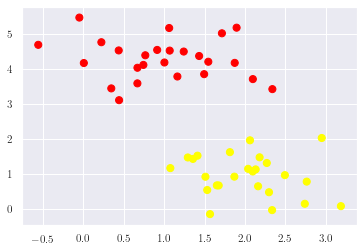

In [45]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

(-1, 3.5)

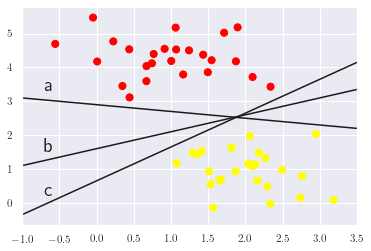

In [47]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

for x0, y0, text in [(-0.7, 3.3, "a"), (-0.7, 1.5, "b"), (-0.7, 0.2, "c")]:
    plt.text(x0, y0, text, fontsize=20)

plt.xlim(-1, 3.5)

### Which line is better?

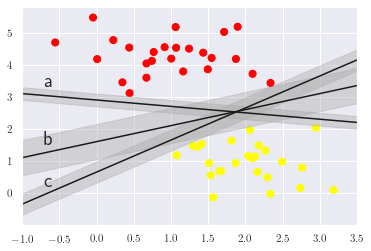

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
    
for x0, y0, text in [(-0.7, 3.3, "a"), (-0.7, 1.5, "b"), (-0.7, 0.2, "c")]:
    plt.text(x0, y0, text, fontsize=20)

plt.xlim(-1, 3.5);

**For SVM, the best hyperplane is the one that maximizes the margins from both tags**

(-1, 3.5)

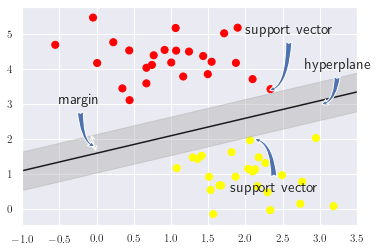

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(0.5, 1.6, 0.55)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit,
                     yfit - d,
                     yfit + d,
                     edgecolor='none',
                     color='#AAAAAA',
                     alpha=0.4)
plt.annotate("hyperplane",
             xy=(3, 3),
             xycoords="data",
             xytext=(2.8, 4),
             textcoords="data",
             size=15,
             arrowprops=dict(arrowstyle="fancy", connectionstyle="angle3"))
plt.annotate("margin",
             xy=(0, 1.8),
             xycoords="data",
             xytext=(-0.5, 3),
             textcoords="data",
             size=15,
             arrowprops=dict(arrowstyle="fancy", connectionstyle="angle3"))
plt.annotate("support vector",
             xy=(2.3, 3.4),
             xycoords="data",
             xytext=(2, 5),
             textcoords="data",
             size=15,
             arrowprops=dict(arrowstyle="fancy", connectionstyle="angle3"))
plt.annotate("support vector",
             xy=(2.1, 2),
             xycoords="data",
             xytext=(1.8, 0.5),
             textcoords="data",
             size=15,
             arrowprops=dict(arrowstyle="fancy", connectionstyle="angle3"))
plt.annotate("",
             xy=(0, 1.6),
             xytext=(-0.08, 2.18),
             arrowprops=dict(arrowstyle="<->"))
plt.xlim(-1, 3.5)

## Usage

### `from sklearn.svm import SVC`
C-Support Vector Classification. The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.

### `from sklearn.svm import NuSVC`
Nu-Support Vector Classification. Similar to SVC but uses a parameter to control the number of support vectors. The implementation is based on libsvm.
### `from sklearn.svm import LinearSVC`
Similar to SVC with parameter `kernel=’linear’`, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [50]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y)
# model?

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X,
               Y,
               P,
               colors='k',
               levels=[-1, 0, 1],
               alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,
                   linewidth=1,
                   facecolors='none',
                   edgecolors='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

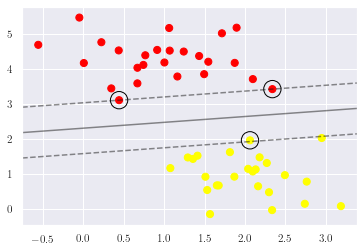

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [9]:
model.support_vectors_ # get support vectors

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [10]:
model.n_support_ # get number of support vectors for each class

array([2, 1], dtype=int32)

In [11]:
model.predict(np.array([[2,1], [0, 4]])) # predict

array([1, 0])

In [12]:
# y = a * x + b
w = model.coef_[0]
a = -w[0] / w[1]
b = -model.intercept_[0] / w[1]

## More than Basic SVM
- support vector
- kernel SVM (`kernel`, `gamma`)
- softening margins (`C`)
- multiclass classification

### Support vector

In [13]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200,
                      centers=2,
                      random_state=0,
                      cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

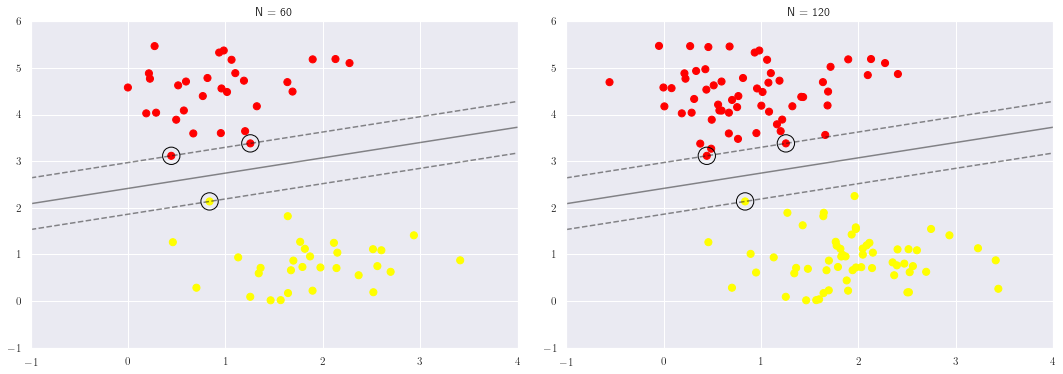

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Other points further from the margin these points do not contribute to the loss function used to fit the model**

**SVM is not sentive to perturbation, thus a great tool for discriminative classiﬁcation**

In [15]:
from ipywidgets import interact, fixed
interact(plot_svm, N=(20, 100, 2), ax=fixed(None))

interactive(children=(IntSlider(value=20, description='N', min=20, step=2), Output()), _dom_classes=('widget-i…

<function __main__.plot_svm(N=10, ax=None)>

## Kervel SVM

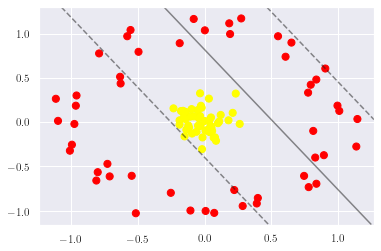

In [16]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [17]:
r = np.exp(-(X ** 2).sum(1))

In [18]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[30, 90], azip=(-180, 180), X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(30, 90), value=30), IntSlider(value=30, descriptio…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.00782598, -0.09585008],
       [ 0.03644281,  0.01978551],
       [ 0.82694829, -0.39940821],
       [ 0.28504628, -0.94668024],
       [-0.13564631, -0.08545488],
       [ 0.04831382,  0.05347082],
       [-0.08070551,  1.16577337],
       [-0.80807162, -0.65904426],
       [-0.23162639,  0.15621085],
       [-0.11609404, -0.06015487],
       [ 1.14192166,  0.03582981],
       [-0.03321821,  0.32615849],
       [ 0.26275801, -0.01955777],
       [-0.72517958, -0.47075855],
       [-0.62658221,  0.43696767],
       [-0.15995051,  0.12836356],
       [-0.02129062,  0.16339311],
       [-0.01866864, -0.30472008],
       [ 0.07828189, -0.17163684],
       [-0.09664484,  0.14780079],
       [-0.14227517,  0.03464444],
       [ 0.60537806,  0.73928477],
       [ 0.74375233, -0.60658462],
       [-0.18645944,  0.02098911],
       [ 0.02898283, -0.07959554],
       [-0.17549833,  0.12624733],
       [-0.03307484,  0.06949195],
       [

**Radial basis function (RBF)**

In [55]:
clf = SVC(kernel='rbf', gamma='auto', C=1e6)
# clf = SVC(kernel='rbf', gamma=1e3, C=1e6) # Kernel coefficient, generalization error and cause over-fitting problem
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1000.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

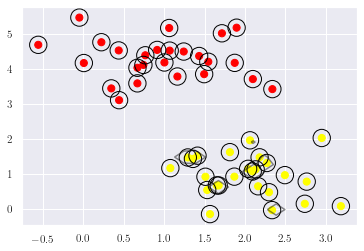

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=300,
            lw=1,
            facecolors='none')

https://www.youtube.com/watch?time_continue=35&v=3liCbRZPrZA&feature=emb_logo

## Softening margins

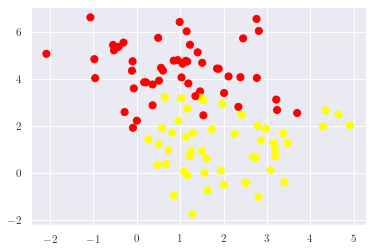

In [21]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

`C`: Penalty parameter of the error term

controls the trade-off between smooth decision boundaries and classifying the training points correctly.

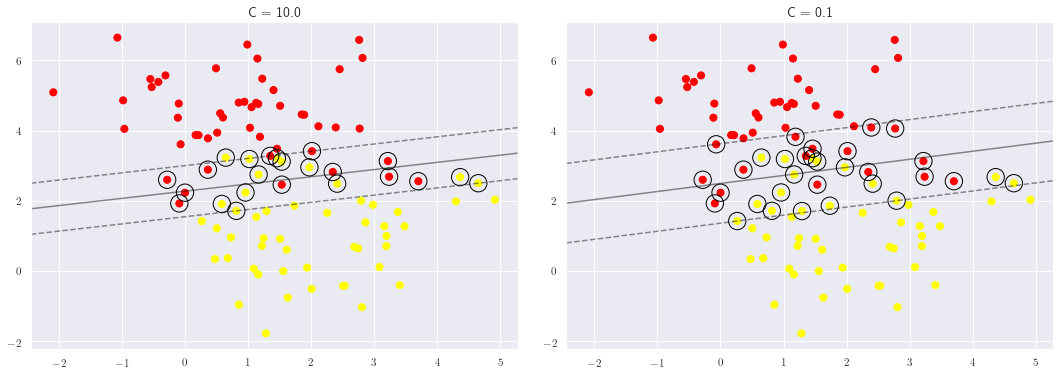

In [57]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300,
                lw=1,
                facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Multiclass classification
### One-vs.-rest (OvR)
$K$ classes


`LinearSVC`
### One-vs.-One (OvO)
$K(K-1)/2$ classes


`SVC` and `NuSVC`

In [23]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [24]:
from sklearn.svm import LinearSVC
models = (SVC(kernel='linear', C=1.0),
          LinearSVC(C=1.0, max_iter=10000))
models = (clf.fit(X, y) for clf in models)

In [25]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [26]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

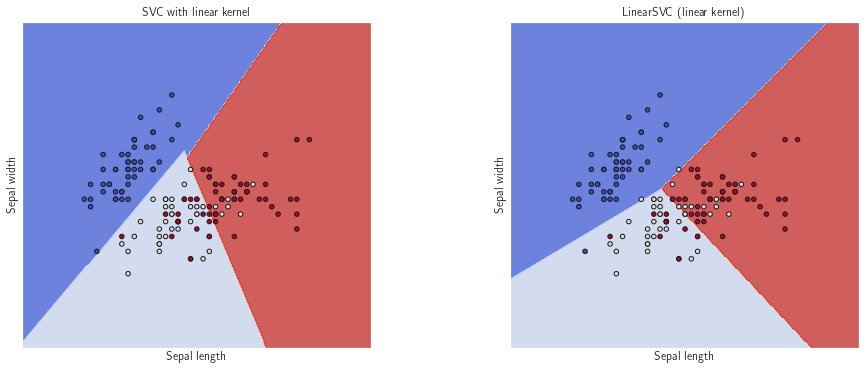

In [27]:
fig, sub = plt.subplots(1, 2, figsize=(15,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)')

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Applications
- RR Lyrae
- Face Recognition

### RR Lyrae

In [72]:
from astroML.utils import pickle_results
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]
(X_train, X_test), (y_train, y_test) = split_samples(X,
                                                     y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr
Ncolors = np.arange(1, X.shape[1] + 1)

In [61]:
@pickle_results('SVM_rrlyrae.pkl')
def compute_SVM(Ncolors):
    classifiers = []
    predictions = []

    for nc in Ncolors:
        # perform support vector classification
        clf = SVC(kernel='linear', class_weight='balanced')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions


classifiers, predictions = compute_SVM(Ncolors)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

@pickle_results: using precomputed results from 'SVM_rrlyrae.pkl'
completeness [0.99270073 1.         1.         1.        ]
contamination [0.90014684 0.85347594 0.85347594 0.85471898]


In [62]:
clf = classifiers[1]
w = clf.coef_[0]
a = -w[0] / w[1]
yy = np.linspace(-0.1, 0.4)
xx = a * yy - clf.intercept_[0] / w[1]

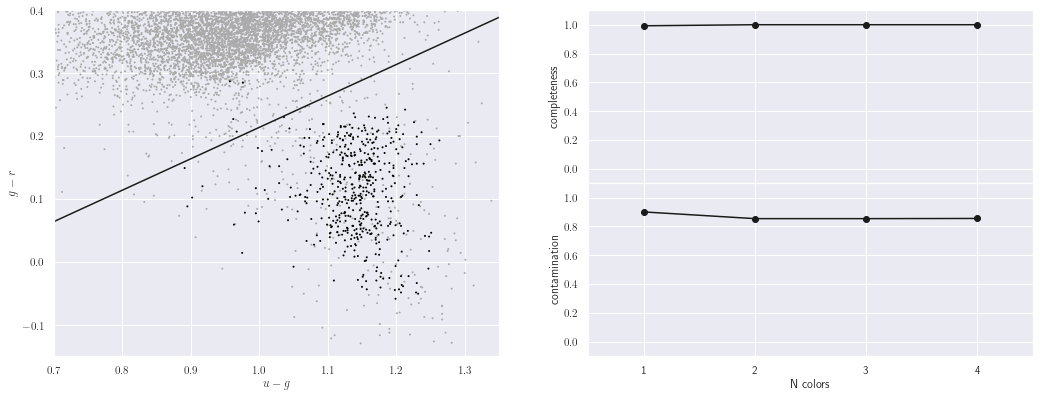

In [31]:
fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(bottom=0.15,
                    top=0.95,
                    hspace=0.0,
                    left=0.1,
                    right=0.95,
                    wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
ax.plot(xx, yy, '-k')
im = ax.scatter(X[-N_plot:, 1],
                X[-N_plot:, 0],
                c=y[-N_plot:],
                s=4,
                lw=0,
                cmap=plt.cm.binary,
                zorder=2)
im.set_clim(-0.5, 1)

ax.set_xlim(0.7, 1.35)
ax.set_ylim(-0.15, 0.4)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

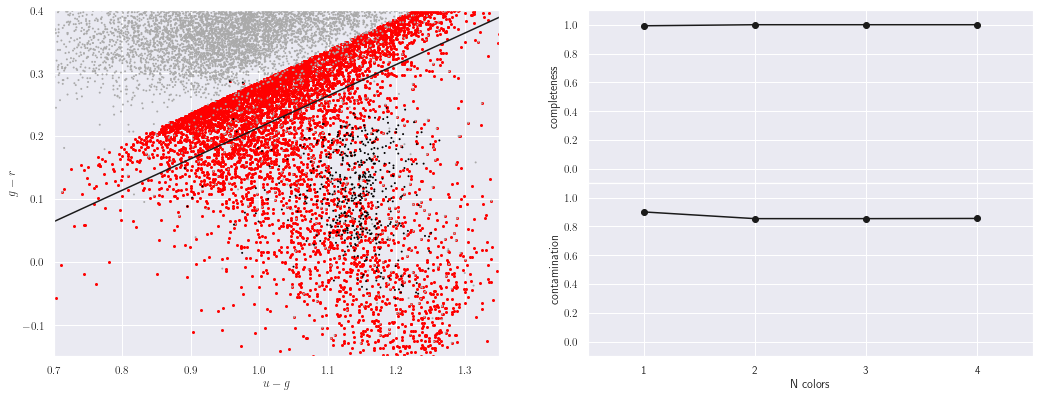

In [63]:
fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(bottom=0.15,
                    top=0.95,
                    hspace=0.0,
                    left=0.1,
                    right=0.95,
                    wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
ax.plot(xx, yy, '-k')
im = ax.scatter(X[-N_plot:, 1],
                X[-N_plot:, 0],
                c=y[-N_plot:],
                s=4,
                lw=0,
                cmap=plt.cm.binary,
                zorder=2)

ax.scatter(clf.support_vectors_[:, 1],
           clf.support_vectors_[:, 0],
           s=4,
           c='red')
im.set_clim(-0.5, 1)

ax.set_xlim(0.7, 1.35)
ax.set_ylim(-0.15, 0.4)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

In [32]:
@pickle_results('kernelSVM_rrlyrae.pkl')
def compute_SVM(Ncolors):
    classifiers = []
    predictions = []

    for nc in Ncolors:
        # perform support vector classification
        clf = SVC(kernel='rbf', gamma=20.0, class_weight='balanced')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions


classifiers, predictions = compute_SVM(Ncolors)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

@pickle_results: using precomputed results from 'kernelSVM_rrlyrae.pkl'
completeness [1. 1. 1. 1.]
contamination [0.90108303 0.83901293 0.83573141 0.81561238]


In [33]:
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 101),
                     np.linspace(ylim[0], ylim[1], 101))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

# smooth the boundary
from scipy.ndimage import gaussian_filter
Z = gaussian_filter(Z, 2)

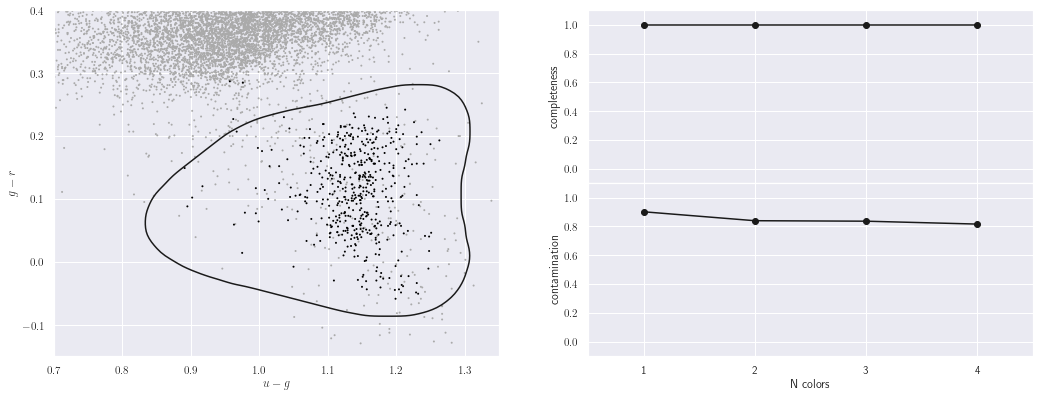

In [34]:
fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(bottom=0.15,
                    top=0.95,
                    hspace=0.0,
                    left=0.1,
                    right=0.95,
                    wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1],
                X[-N_plot:, 0],
                c=y[-N_plot:],
                s=4,
                lw=0,
                cmap=plt.cm.binary,
                zorder=2)
im.set_clim(-0.5, 1)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

### Face Recognition

In [35]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


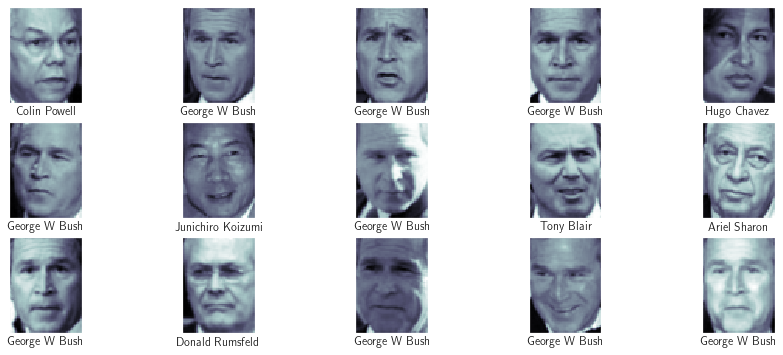

In [36]:
fig, ax = plt.subplots(3, 5, figsize=(15,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

**Use PCA to extract 150 fundamental components to feed into SVC**

In [37]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [38]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data,
                                                faces.target,
                                                random_state=42)

**Use a grid search cross-validation to explore combinations of parameters**

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svc__C': [1, 5, 10, 50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
}
grid = GridSearchCV(model, param_grid, cv=5, iid=False)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 39s, sys: 1.83 s, total: 1min 41s
Wall time: 32.4 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [40]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

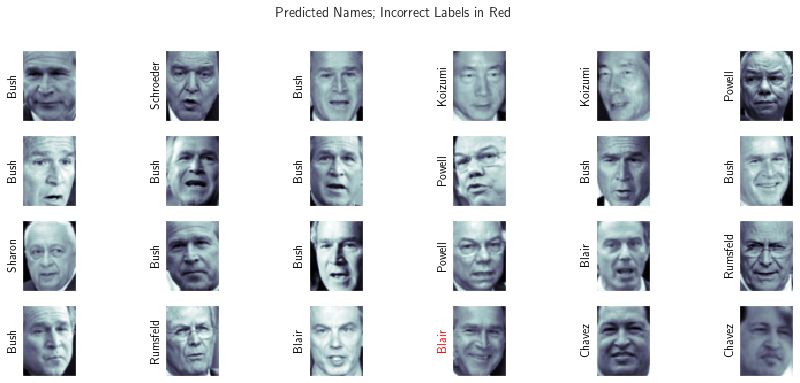

In [41]:
fig, ax = plt.subplots(4, 6, figsize=(15,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.76      0.84      0.80        31
    George W Bush       0.97      0.81      0.88       126
Gerhard Schroeder       0.69      0.87      0.77        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.89      0.98      0.93        42

         accuracy                           0.85       337
        macro avg       0.82      0.87      0.83       337
     weighted avg       0.87      0.85      0.86       337



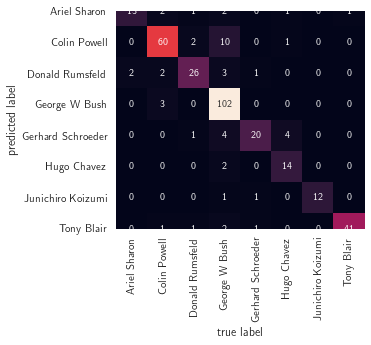

In [43]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Summary
*Pros*:
- It works really well with a clear margin of separation
- Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
- It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.


*Cons*:
- It doesn’t perform well when we have large data set because the required training time is higher
- It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping. The results are strongly dependent on a suitable choice for the softening parameter `C`.
- SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.